In [7]:
import os
import pandas as pd
import time
import statsmodels.api as sm
import sklearn.utils as utils
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
start_time = time.time()
MA_location = {"Greater_Boston_Area" : 0,
         "Salem" : 0, 
         "Plymouth" : 0, 
         "Waltham" : 0, 
         "Framingham" : 0,
         "Worcester" : 0,
         "Lexington" : 0,
         "Danvers" : 0,
        }
Greater_Boston_Area = {"Boston" : 0, 
                       "Providence" : 0, 
                       "Lowell" : 0, 
                       "Cambridge" : 0, 
                       "Quincy" : 0,
                       "Newton" : 0
                      }
#A_cities = ["Boston","Worcester","Salem","Plymouth","Newton","Waltham","Framingham"]
data = pd.DataFrame(columns = ["Company","Title","Location","Rating","Work/Life Balance","Benefit","Security","Culture"])
print(MA_cities)
#path = os.getcwd()+str("/Company")
#print("Path is :",path)
#index = 0
#for file in os.listdir(path):
#    f = open(path+"/"+file,'r')
#    df = pd.read_csv(f)
#    for i in range(len(df.index)):
#        if df["Location"][i] in MA_cities:
#            data.loc[index] = df.loc[i]
#            index = index+1
path = os.getcwd()
print("Path is :", path)
f = open("Merged_Company_Information.csv",'r')
#f = open(path+"/Company/Accion-International.csv",'r')
df = pd.read_csv(f)
index = 0
for i in range(len(df.index)):
    if df["Location"][i] in MA_location.keys():
        data.loc[index] = df.loc[i]
        index = index+1
    elif df["Location"][i] in Greater_Boston_Area.keys():
        data.loc[index] = df.loc[i]
        data.set_value(index,"Location","Greater_Boston_Area")
        #ata.loc[index]["Location",copy = False]=str("Greater_Boston_Area")
        index = index+1
print("Done!!!-------- %s seconds--------" % (time.time()-start_time))

['Boston', 'Worcester', 'Salem', 'Plymouth', 'Newton', 'Waltham', 'Framingham']
Path is : /Users/shuhanliu/Documents/CS505/project_new/Industries-Distribution-Analyzer-and-predicter
Done!!!-------- 36.52635407447815 seconds--------


In [13]:
data

,Company,Title,Location,Rating,Work/Life Balance,Benefit,Security,Culture
0,Accion-International,Communications,Greater_Boston_Area,4.0,none,5,none,5
1,Accion-International,Communications,Greater_Boston_Area,4.0,none,none,5,none
2,Advanced-Micro-Devices--Inc-,"Co-op Engineer, Technology SoC team",Greater_Boston_Area,5.0,3,5,5,5
3,Advanced-Micro-Devices--Inc-,"Co-op Engineer, Technology SoC team",Greater_Boston_Area,5.0,4,5,5,4
4,AIR Worldwide,Risk Data Modelling Analyst - Scrum Master,Greater_Boston_Area,3.0,4,5,4,5
5,AIR Worldwide,Senior Technical Writer,Greater_Boston_Area,5.0,5,5,5,5
6,AIR Worldwide,Senior Database Engineer,Greater_Boston_Area,4.0,5,5,5,5
7,AIR Worldwide,do not give out,Greater_Boston_Area,3.0,4,5,2,4
8,AIR Worldwide,Software Engineer III,Greater_Boston_Area,4.0,4,5,5,5
9,AIR Worldwide,QA Software Engineer,Greater_Boston_Area,4.0,4,5,5,4


In [14]:
data.to_csv("collected_data.csv")

In [21]:
def findMean(lst):
    total = 0 
    num = 0
    for i in lst:
        if i!= "none":
            total = total + int(i)
            num = num + 1
    avg = float(total)/float(num)
    return avg

In [23]:
#normalize the data:
start_time = time.time()
data_list = []
avg_work = findMean(data["Work/Life Balance"])
avg_benefit = findMean(data["Benefit"])
avg_security = findMean(data["Security"])
avg_culture = findMean(data["Culture"])
for i in range(len(data.index)):
    temp = [0,0,0,0,0,0,0]
    if data["Title"][i].find("Engineer")!=-1:
        temp[0] = 1
    elif data["Title"][i].find("Analyst")!=-1:
        temp[0] = 2
    elif data["Title"][i].find("Consultant")!=-1:
        temp[0] = 3
    elif data["Title"][i].find("Writer")!=-1:
        temp[0] = 4
    elif data["Title"][i].find("Account")!=-1:
        temp[0] = 5
    elif data["Title"][i].find("Marketing")!=-1:
        temp[0] = 6
    elif data["Title"][i].find("Research")!=-1:
        temp[0] = 7
    elif data["Title"][i].find("Clinic")!=-1:
        temp[0] = 8
    elif data["Title"][i].find("Develop")!=-1:
        temp[0] = 9
    else:
        temp[0] = 0
        
    Location = data["Location"][i]
    lst = list(MA_location.keys())
    for k in range(len(lst)):
        if lst[k] == Location:
            temp[1] = k+1
    temp[2] = data["Rating"][i]
    if data["Work/Life Balance"][i]!="none":
        temp[3] = data["Work/Life Balance"][i]
    else:
        temp[3] = avg_work
    if data["Benefit"][i]!="none":
        temp[4] = data["Benefit"][i]
    else:
        temp[4] = avg_benefit
    if data["Security"][i]!="none":
        temp[5] = data["Security"][i]
    else:
        temp[5] = avg_security
    if data["Culture"][i]!="none":
        temp[6] = data["Culture"][i]
    else:
        temp[6] = avg_culture
    data_list.append(temp)
print("Done!!!-------- %s seconds--------" % (time.time()-start_time))

Done!!!-------- 2.0568978786468506 seconds--------


In [24]:
df2 = pd.DataFrame(data_list,columns = ["Category","Location","Rating","Work/Life Balance","Benefit","Security","Culture"])

In [25]:
df2

,Category,Location,Rating,Work/Life Balance,Benefit,Security,Culture
0,0,1,4.0,3.96638,5,4.27133,5
1,0,1,4.0,3.96638,4.44641,5,4.17487
2,1,1,5.0,3,5,5,5
3,1,1,5.0,4,5,5,4
4,2,1,3.0,4,5,4,5
5,4,1,5.0,5,5,5,5
6,1,1,4.0,5,5,5,5
7,0,1,3.0,4,5,2,4
8,1,1,4.0,4,5,5,5
9,1,1,4.0,4,5,5,4


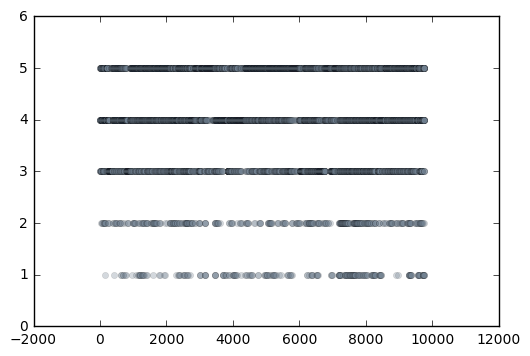

In [26]:
X = df2[["Category","Location","Work/Life Balance","Benefit","Security","Culture"]]
Y = df2["Rating"]
plt.scatter(range(len(Y)), Y, c="slategray", alpha=0.3, linewidths=0.2)

In [29]:
X, Y = utils.shuffle(X, Y, random_state=1)
model = sm.OLS(Y.astype(float), X.astype(float))
result1 = model.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.110e+04
Date:                Tue, 13 Dec 2016   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -14932.
No. Observations:                9771   AIC:                         2.988e+04
Df Residuals:                    9765   BIC:                         2.992e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Category              0.0467      0.00

In [31]:
good = []
for i in range(len(df2["Rating"])):
    if df2["Rating"][i] >3:
        good.append(1)
    else:
        good.append(0)

cols = ["Category","Location","Work/Life Balance","Benefit","Security","Culture"]
#df2.columns[:2]
logit = sm.Logit(good,df2[cols].astype(float))

#fit the model
result2 = logit.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.574315
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9771
Model:                          Logit   Df Residuals:                     9765
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Dec 2016   Pseudo R-squ.:              -0.0006029
Time:                        16:27:20   Log-Likelihood:                -5611.6
converged:                       True   LL-Null:                       -5608.3
                                        LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Category              0.0494      0.011      4.570      0.000         0.028     0.071
Location              0.0042      0.010      0.420      0.675        -0.016     0.024
Work/Life Balance    -0.0243      0.031     -0.786      0.432        -0.085     0.036
Benefit               0.1000      0.027      3.659      0.000         0.046     0.154
Security              0.0479      0.031      1.535      0.125        -0.013     0.109
Culture               0.0999      0.033      3.046      0.002         0.036     0.164
=====================================================================================
"""

In [ ]:
#According to the results provided by both 
#Linear Regression and Logic Regression,
#Benefit always has a larger influence
#on rating among all attributes.